In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
# Coordinates of boundaries of area of Lower Silesian Voivodeship

NORTH =  51.8047222
EAST = 14.8172222
SOUTH = 50.0961111
WEST = 17.795

# Population

#POPULATION = 2898525
POPULATION = 200
AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN = 2.50
NUMBER_OF_HOUSEHOLDS = int(POPULATION/AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN)
NUMBER_OF_HOUSEHOLDS = int(5/6 * NUMBER_OF_HOUSEHOLDS)

# Rectangular network:
HEIGHT = NORTH - SOUTH
WIDTH = WEST - EAST
NUMBER_OF_POINTS = NUMBER_OF_HOUSEHOLDS

NUMBER_OF_NODES_HEIGHT = int(math.sqrt(HEIGHT/WIDTH * NUMBER_OF_POINTS))
NUMBER_OF_NODES_WIDTH = int(NUMBER_OF_POINTS/NUMBER_OF_NODES_HEIGHT)

LENGTH_HEIGHT = HEIGHT/NUMBER_OF_NODES_HEIGHT
LENGTH_WIDTH = WIDTH/NUMBER_OF_NODES_WIDTH

In [3]:
COORDINATES = []
for x in range(NUMBER_OF_NODES_WIDTH):
    for y in range(NUMBER_OF_NODES_HEIGHT):
        COORDINATES.append((x*LENGTH_WIDTH, y*LENGTH_HEIGHT))
        
X_COORDINATES = [x[0] for x in COORDINATES]
Y_COORDINATES = [x[1] for x in COORDINATES]

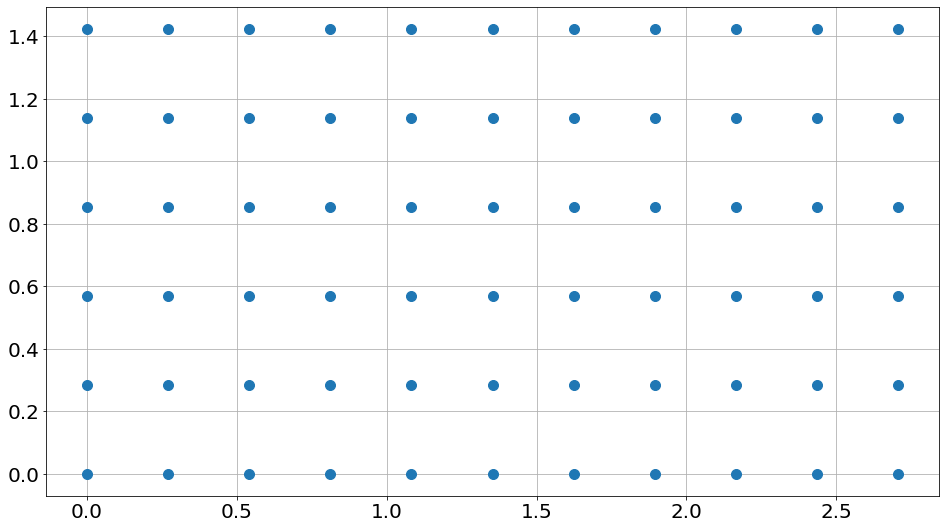

In [4]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(X_COORDINATES, Y_COORDINATES, '.', markersize=20)
plt.show()

In [5]:
G = nx.grid_2d_graph(NUMBER_OF_NODES_HEIGHT, NUMBER_OF_NODES_WIDTH)

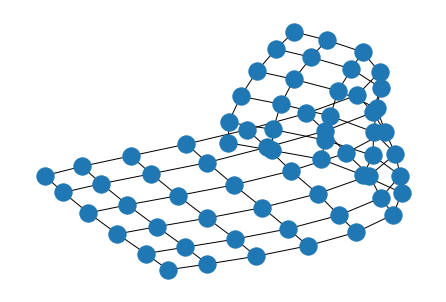

In [6]:
nx.draw(G)